In [1]:
# -*- coding: utf-8 -*-
"""fashion-and-mnist-example.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1K6tL2UdI4N4eKtOvzk2tcHxB7kQzenS3
"""

"Import data DataSet"

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [24]:
mnist = tf.keras.datasets.mnist
"Load fashion mnist dataset"
fashion_dataset = tf.keras.datasets.fashion_mnist
"Load mnist dataset"
mnist = tf.keras.datasets.mnist

(mimages , mtargets) , (mimages_test,mtargets_test) = mnist.load_data()
#(images , targets) , (images_test,targets_test) = fashion_dataset.load_data()


In [30]:
mimages.shape

(60000, 28, 28)

3


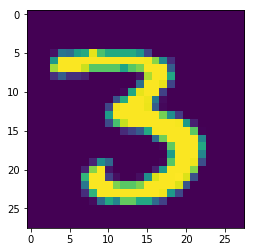

In [213]:
print(mtargets[12])
plt.imshow(mimages[12])

In [3]:
"Flatten"
#images = images.reshape(-1,784)
#images = images.astype(float)


mimages = mimages.reshape(-1,784)
mimages = mimages.astype(float)



#images_test = images_test.reshape(-1,784)
#images_test = images_test.astype(float)

mimages_test = mimages_test.reshape(-1,784)
mimages_test = mimages_test.astype(float)

"Normalize data"

#scaler = StandardScaler()
#images = scaler.fit_transform(images)
#images_test = scaler.transform(images_test)



scaler = StandardScaler()
mimages = scaler.fit_transform(mimages)
mimages_test = scaler.transform(mimages_test)

"Create model"

'Create model'

In [4]:

modelm = tf.keras.Sequential()

modelm.add(tf.keras.layers.Dense(256,activation="relu"))
modelm.add(tf.keras.layers.Dense(126, activation="relu"))
modelm.add(tf.keras.layers.Dense(10,activation="softmax"))

"Compile model"
#model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
modelm.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])


In [5]:

"Fit model"
#model.fit(images,targets , epochs=10,validation_split=0.2)
modelm.fit(mimages,mtargets , epochs=10,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/sample - loss: 1.3629 - accuracy: 0.6138 - val_loss: 0.7586 - val_accuracy: 0.8224
Epoch 2/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.6146 - accuracy: 0.8435 - val_loss: 0.4865 - val_accuracy: 0.8750
Epoch 3/10
48000/48000 [==============================] - 2s 46us/sample - loss: 0.4441 - accuracy: 0.8810 - val_loss: 0.3928 - val_accuracy: 0.8970
Epoch 4/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.3686 - accuracy: 0.8978 - val_loss: 0.3446 - val_accuracy: 0.9091
Epoch 5/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.3242 - accuracy: 0.9086 - val_loss: 0.3147 - val_accuracy: 0.9154
Epoch 6/10
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2936 - accuracy: 0.9165 - val_loss: 0.2933 - val_accuracy: 0.9201
Epoch 7/10
48000/48000 [==============================] 

In [20]:
loss , acc = modelm.evaluate(mimages_test , mtargets_test)
print("Accuracy :" , acc )
print(" Loss : " , loss)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.2434 - accuracy: 0.9288
Accuracy : 0.9288
 Loss :  0.2433958351403475


In [ ]:
#Example

In [199]:
image = np.load("image.png.npy")

In [200]:
image = image.reshape(280,280,-1)

In [201]:
image = image[:,:,0:1]

In [202]:
image = tf.keras.preprocessing.image.array_to_img(image)

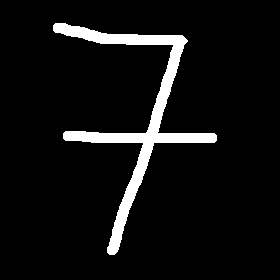

In [203]:
image

In [204]:
image.thumbnail((28,28))

In [205]:
img = np.array(image)

In [206]:
img = img /255 

In [207]:
img.astype(float)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4745098 , 0.68235294, 0.43921569, 0.26666667, 0.05490196,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [208]:
x = img.reshape(-1,784)
#x /=  255 #(img - 128.0) / 128.0
x.shape

(1, 784)

In [68]:
import matplotlib.pyplot as plt

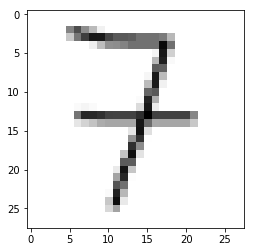

In [209]:
plt.imshow(image, cmap="binary")

In [210]:
pred = modelm.predict(x)

In [211]:
np.argmax(pred)

8

In [212]:
pred

array([[0.029194  , 0.08925167, 0.06907778, 0.15023401, 0.08851179,
        0.06632397, 0.15307483, 0.06231881, 0.1704064 , 0.12160672]],
      dtype=float32)